<a href="https://colab.research.google.com/github/surupi/MachineLearning-IEM2ndYear/blob/main/kNN_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mounting google drive to make dataset available for use#

In [ ]:
import io
# Python io module allows us to manage the file-related input and output operations 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#Fitting dataset in a dataframe (df)

In [ ]:
# to get the address, go to drive on left side, press on three dots and click copy path
df = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/CSV- KNN Algorithm_Data_Set_v2.0.csv')
print("Shape of dataframe: ", df.shape)
print("Columns of dataframe: ", df.columns)
df.describe()

Shape of dataframe:  (16, 4)
Columns of dataframe:  Index(['Name', 'Aptitude', 'Communication', 'Class'], dtype='object')


,Aptitude,Communication
count,16.000000,16.000000
mean,5.562500,4.937500
std,2.064582,1.631717
min,2.000000,2.000000
25%,4.750000,3.750000
50%,6.000000,5.250000
75%,7.000000,6.000000
max,9.000000,7.000000


#Data Visualization

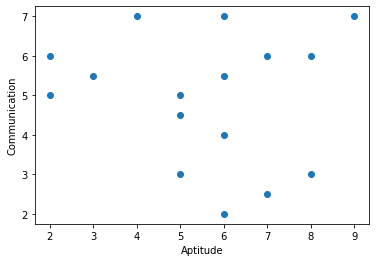

In [ ]:
plt.xlabel("Aptitude")
plt.ylabel("Communication")
plt.scatter(df.Aptitude,df.Communication)

#Splitting data into training and testing set

In [ ]:
from sklearn.model_selection import train_test_split
predictors = df.iloc[:,1:3]
target = df.iloc[:,3]
#df.iloc[<row selection> , <column selection>]
# df.iloc[:,1:3] = is used to select all rows (:) of columns 1 and 2 (1:3)
#print (predictors)
#print (target)
train, test = train_test_split(df, test_size =0.3, random_state=0)
#print (train.head)
#print (test.head)
trainX, testX, trainY, testY = train_test_split(predictors, target, test_size =0.1, random_state=0)
print (trainX)
print (testX)
print (trainY)
print (testY)

    Aptitude  Communication
8          8            3.0
9          6            5.5
13         9            7.0
4          8            6.0
2          7            6.0
14         5            4.5
10         6            4.0
7          3            5.5
15         5            5.0
11         6            7.0
3          7            2.5
0          2            5.0
5          4            7.0
12         6            2.0
   Aptitude  Communication
1         2            6.0
6         5            3.0
8       Intel
9      Leader
13     Leader
4      Leader
2      Leader
14      Intel
10      Intel
7     Speaker
15    Speaker
11     Leader
3       Intel
0     Speaker
5     Speaker
12      Intel
Name: Class, dtype: object
1    Speaker
6      Intel
Name: Class, dtype: object


#Create KNN classification model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN_Classifier = KNeighborsClassifier (n_neighbors=3) # looking at the top 3 closest point for each element in test X and selecting the class that the majority of the 3 belongs in
KNN_Classifier.fit(trainX, trainY) # training model and making it ready to predict results from text X
print ("Train set predictions: {}".format(KNN_Classifier.predict(testX))) #prdicting result

Train set predictions: ['Speaker' 'Intel']


#Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = KNN_Classifier.score(testX, testY)
print (accuracy)
from sklearn.metrics import confusion_matrix
predictions = KNN_Classifier.predict(testX)
confusion_matrix = confusion_matrix(testY, predictions)
print (confusion_matrix)
# her the model evaluation checks how close the predicted values from kNN ar to the testY values

1.0
[[1 0]
 [0 1]]
